# Simulation & Optimization in Robotics & Biomechanics

## Exercise 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Anthropometric properties of the person

In [2]:
# Height
H = 1.75  # [m]

# Total mass of the person
M = 80  # [kg]

# Gravity acceleration
g = 9.81  # [m/s^2] on Earth's surface

# Mass of additional weight
m_w = 0  # [kg]

# Length of the leg
# (Fig. 4.1, pg. 83, Winter, 2009)
L = (0.285 - 0.039) * H  # [m]

# Position of the center of mass with respect to the knee
# (Tab. 4.1, pg. 86, Winter, 2009)
c = 0.606 * L  # [m]

# Mass of the shank and foot
# (Fig. 4.1, pg. 83, Winter, 2009)
m_sf = 0.061 * M  # [kg]

# Total mass of the model (shank + foot + extra weight)
m = m_sf + m_w  # [kg]

# Moment of inertia of the shank+foot segment with respect to the knee
J_sf = m_sf * (0.735 * L) ** 2  # [kg.m^2]

# Moment of inerti of the additional weight with respect to the knee
J_w = m_w * L**2  # [kg.m^2]

# Total moment of inertia of the model with respect to the knee
J = J_sf + J_w  # [kg.m^2]

### Inverse Dynmics

In [3]:
# Senoidal motion
phim = np.pi / 4  # [rd] average angle
phi0 = np.pi / 6  # [rd] amplitude of motion
T = 2  # [s] period
n = 3  # number of cycles

# Time vector for n complete cycles
# TODO
# matlab code: t = 0:T/1000:n*T
t = np.arange(0, n * T, T / 1000)

# Vector of angles for phi
phi = phim - phi0 * np.cos(t * 2 * np.pi / T)

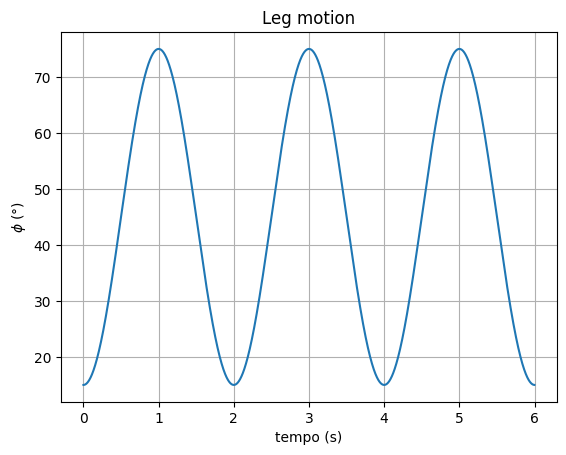

In [4]:
# Plot the prescribed leg motion
plt.plot(t, phi * 180 / np.pi)
plt.xlabel('tempo (s)')
plt.ylabel(r'$\phi$ (°)')  # Using the r before the string for raw string to correctly show the phi symbol
plt.title('Leg motion')
plt.grid(True)
plt.box(True)  # This will ensure the figure has a box around it.
plt.show()

In [5]:
# Angular velocity
phi_d = phi0 * (2 * np.pi / T) * np.sin(2 * np.pi * t / T)

# Angular acceleration
phi_dd = phi0 * (2 * np.pi / T) ** 2 * np.cos(2 * np.pi * t / T)

# Inverse Dynamics
tau_grav = -m * g * c * np.cos(phi)  # gravitational component of knee joint moment
tau_in = J * phi_dd  # inertial component of knee joint moment
tau = tau_grav + tau_in  # total knee joint moment

In [6]:
# Cost Function - Effort
C = np.mean(tau**2)
print("The cost function value is ", C, "(N.m)^2.")

The cost function value is  69.89807891039165 (N.m)^2.


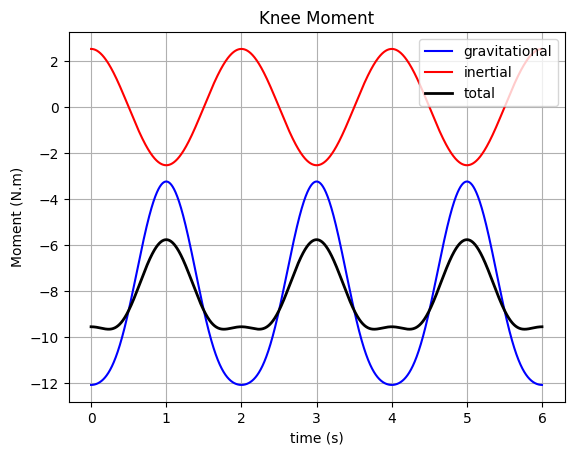

In [7]:
# Plotting
plt.figure()
plt.plot(t, tau_grav, 'b', label='gravitational')
plt.plot(t, tau_in, 'r', label='inertial')
plt.plot(t, tau, 'k', linewidth=2, label='total')

# Add labels, title, and legend
plt.xlabel('time (s)')
plt.ylabel('Moment (N.m)')
plt.title('Knee Moment')
plt.legend()
plt.grid(True)
plt.box(True)  # This will ensure the figure has a box around it.
plt.show()